In [1]:
import pandas as pd
import numpy as np

In [2]:
dfcountry = pd.read_csv("Country.csv")
dfcountry.head()
dfindicators = pd.read_csv("Indicators.csv")
dfindicators

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
...,...,...,...,...,...,...
5656453,Zimbabwe,ZWE,Time required to register property (days),IC.PRP.DURS,2015,3.600000e+01
5656454,Zimbabwe,ZWE,Time required to start a business (days),IC.REG.DURS,2015,9.000000e+01
5656455,Zimbabwe,ZWE,Time to prepare and pay taxes (hours),IC.TAX.DURS,2015,2.420000e+02
5656456,Zimbabwe,ZWE,Time to resolve insolvency (years),IC.ISV.DURS,2015,3.300000e+00


In [3]:
Region = [
    "Arab World", 
    "Caribbean small states",
    "Central Europe and the Baltics",
    "East Asia & Pacific (all income levels)",
    "Euro area","Europe & Central Asia (all income levels)",
    "European Union",
    "Latin America & Caribbean (all income levels)",
    "Middle East & North Africa (all income levels)",
    "North America",
    "Pacific island small states",
    "Small states",
    "South Asia",
    "Sub-Saharan Africa (all income levels)",
    "World"
]

In [4]:
rel_col = []
for i in dfindicators["IndicatorName"]:
    if i not in rel_col:
        rel_col.append(i)
        
years = []
for i in range(1990,2012):
    years.append(i)
rel_col

['Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'Age dependency ratio (% of working-age population)',
 'Age dependency ratio, old (% of working-age population)',
 'Age dependency ratio, young (% of working-age population)',
 'Arms exports (SIPRI trend indicator values)',
 'Arms imports (SIPRI trend indicator values)',
 'Birth rate, crude (per 1,000 people)',
 'CO2 emissions (kt)',
 'CO2 emissions (metric tons per capita)',
 'CO2 emissions from gaseous fuel consumption (% of total)',
 'CO2 emissions from liquid fuel consumption (% of total)',
 'CO2 emissions from liquid fuel consumption (kt)',
 'CO2 emissions from solid fuel consumption (% of total)',
 'Death rate, crude (per 1,000 people)',
 'Fertility rate, total (births per woman)',
 'Fixed telephone subscriptions',
 'Fixed telephone subscriptions (per 100 people)',
 'Hospital beds (per 1,000 people)',
 'International migrant stock (% of population)',
 'International migrant stock, total',
 'Life expectancy at birt

In [5]:
len(rel_col)

1344

In [6]:
filtered_ind = dfindicators[dfindicators.IndicatorName.isin(rel_col)]
filtered_ind = filtered_ind[filtered_ind.Year.isin(years)]

In [7]:
filtered_ind

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1880402,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,1990,75.447507
1880403,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,1990,58.680636
1880404,Arab World,ARB,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,1990,91.842354
1880405,Arab World,ARB,Access to non-solid fuel (% of population),EG.NSF.ACCS.ZS,1990,74.223510
1880406,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,1990,72.104721
...,...,...,...,...,...,...
5202279,Zimbabwe,ZWE,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,2011,59.061395
5202280,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,2011,90.930702
5202281,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,2011,92.124565
5202282,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,2011,1.028284


In [8]:
dftransform = filtered_ind[filtered_ind['IndicatorName']=="Adolescent fertility rate (births per 1,000 women ages 15-19)"]


In [9]:
dftest = filtered_ind[filtered_ind['IndicatorName']=="Population density (people per sq. km of land area)"]
dftr = pd.merge(dftransform, dftest, on = ["CountryName", "Year","CountryCode"], how = "left")
dftr = dftr.rename(columns={"Value_x":"Adolescent fertility rate (births per 1,000 women ages 15-19)", "Value_y":"Population density (people per sq. km of land area)"})
dftr=dftr.drop(['IndicatorName_x','IndicatorCode_x','IndicatorName_y','IndicatorCode_y'], axis=1)

In [10]:
for col in rel_col:
    dftest = filtered_ind[filtered_ind['IndicatorName']==col]
    dftr = pd.merge(dftr, dftest, on = ["CountryName", "Year","CountryCode"], how = "left")
    dftr = dftr.rename(columns={"Value": col})
    dftr=dftr.drop(['IndicatorName','IndicatorCode'], axis=1)

In [11]:
dftr

,CountryName,CountryCode,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Population density (people per sq. km of land area),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)",Arms exports (SIPRI trend indicator values),...,Diabetes prevalence (% of population ages 20 to 79),Ease of doing business index (1=most business-friendly regulations),Other taxes payable by businesses (% of commercial profits),Present value of external debt (current US$),Present value of external debt (% of GNI),"Present value of external debt (% of exports of goods, services and primary income)","Bird species, threatened","Fish species, threatened","Mammal species, threatened","Plant species (higher), threatened"
0,Arab World,ARB,1990,69.020564,16.289562,69.020564,87.689065,6.851775,80.085336,5.800000e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Caribbean small states,CSS,1990,90.664634,14.722411,90.664634,69.333476,10.752738,58.214335,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Central Europe and the Baltics,CEB,1990,42.338697,100.238191,42.338697,52.287595,16.940986,35.309607,1.180000e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,East Asia & Pacific (all income levels),EAS,1990,27.067653,74.614978,27.067653,55.450943,8.574028,46.332670,1.255000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,East Asia & Pacific (developing only),EAP,1990,29.100112,100.678074,29.100112,56.830933,7.776660,48.559258,9.450000e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989,Virgin Islands (U.S.),VIR,2011,47.816400,302.240000,47.816400,53.953515,22.262811,31.690705,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4990,West Bank and Gaza,WBG,2011,62.142200,652.334053,62.142200,80.851747,5.008658,75.843089,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4991,"Yemen, Rep.",YEM,2011,67.826400,45.902116,67.826400,80.193948,4.632368,75.561580,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4992,Zambia,ZMB,2011,107.068200,19.294752,107.068200,97.854237,5.774172,92.080065,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
dftr = dftr[dftr.CountryName.isin(Region)]

In [63]:
dftr

,CountryName,CountryCode,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Population density (people per sq. km of land area),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)",Arms exports (SIPRI trend indicator values),...,Diabetes prevalence (% of population ages 20 to 79),Ease of doing business index (1=most business-friendly regulations),Other taxes payable by businesses (% of commercial profits),Present value of external debt (current US$),Present value of external debt (% of GNI),"Present value of external debt (% of exports of goods, services and primary income)","Bird species, threatened","Fish species, threatened","Mammal species, threatened","Plant species (higher), threatened"
0,Arab World,ARB,1990,69.020564,16.289562,69.020564,87.689065,6.851775,80.085336,5.800000e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Caribbean small states,CSS,1990,90.664634,14.722411,90.664634,69.333476,10.752738,58.214335,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Central Europe and the Baltics,CEB,1990,42.338697,100.238191,42.338697,52.287595,16.940986,35.309607,1.180000e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,East Asia & Pacific (all income levels),EAS,1990,27.067653,74.614978,27.067653,55.450943,8.574028,46.332670,1.255000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Euro area,EMU,1990,14.604634,117.739237,14.604634,47.891167,20.775975,27.038061,4.285000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,European Union,EUU,1990,22.283391,113.540127,22.283391,49.567236,20.570096,28.902656,6.594000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Latin America & Caribbean (all income levels),LCN,1990,83.744995,22.220933,83.744995,70.044924,8.037414,61.561240,1.040000e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,Middle East & North Africa (all income levels),MEA,1990,68.680675,22.631199,68.680675,88.232308,7.070190,80.403703,1.440000e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,North America,NAC,1990,53.848894,15.201919,53.848894,51.305439,18.748802,32.542050,1.086300e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,Pacific island small states,PSS,1990,62.779644,26.818269,62.779644,79.591377,5.743395,73.351888,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I drop all rows that have an NaN value for CO2 emissions (metric tons per capita)

In [64]:
dftr = dftr[dftr["CO2 emissions (metric tons per capita)"].notna()]
dftr.shape

(328, 1349)

In [65]:
dftr.isna().sum().sum()

274433

Read a paper that suggested N/3 features for regression at most

In [66]:
# dfthresh = dftr.dropna(thresh=len(dftr)-2150, axis=1)
# dfthresh.shape

In [112]:
dfthresh = dftr.dropna(thresh=28, axis=1)
dfthresh.shape

(328, 771)

I then impute missing data on the whole set

In [113]:
pd.options.display.max_rows = 4000

In [114]:
dfthresh.isna().sum().sum()

90021

In [115]:
dfthreshnostring = dfthresh.drop(['CountryCode', 'CountryName'], axis=1)

In [116]:
dfthreshnostring = dfthreshnostring.apply(lambda x: x.fillna(x.mean()), axis =0)

In [117]:
dfthreshnostring.isnull().values.any()

False

We've imputed data but we can also go back and change our threshold if we're finding it's messing up our features

In [118]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [119]:
Xdata = dfthreshnostring.loc[:, dfthreshnostring.columns != "CO2 emissions (metric tons per capita)"]
Ydata = dfthreshnostring.loc[:, dfthreshnostring.columns == "CO2 emissions (metric tons per capita)"]

In [120]:
Xdata.isnull().values.any()

False

In [121]:
Xdata.shape

(328, 768)

In [122]:
Ydata.shape

(328, 1)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(Xdata, Ydata, test_size = 0.3)

In [124]:
yravel_tr = y_train.loc[:, "CO2 emissions (metric tons per capita)"]
yravel_tr = yravel_tr.values

In [125]:
yravel_tr.shape

(229,)

In [126]:
rf = RandomForestRegressor(n_estimators = 100)
rf= rf.fit(X_train, yravel_tr)

We could also one hot encode countries, might suck but we could

In [127]:
type(X_train)

pandas.core.frame.DataFrame

In [128]:
score = rf.score(X_train, yravel_tr)

In [129]:
print("R-squared:", score)

R-squared: 0.9979082053721593


In [130]:
yravel_te = y_test.loc[:, "CO2 emissions (metric tons per capita)"]
yravel_te = yravel_te.values
yravel_te.shape

(99,)

In [131]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [132]:
ypred = rf.predict(X_test)
mse = mean_squared_error(yravel_te, ypred)

In [133]:
print("MSE:", mse)

MSE: 0.13684001868343745


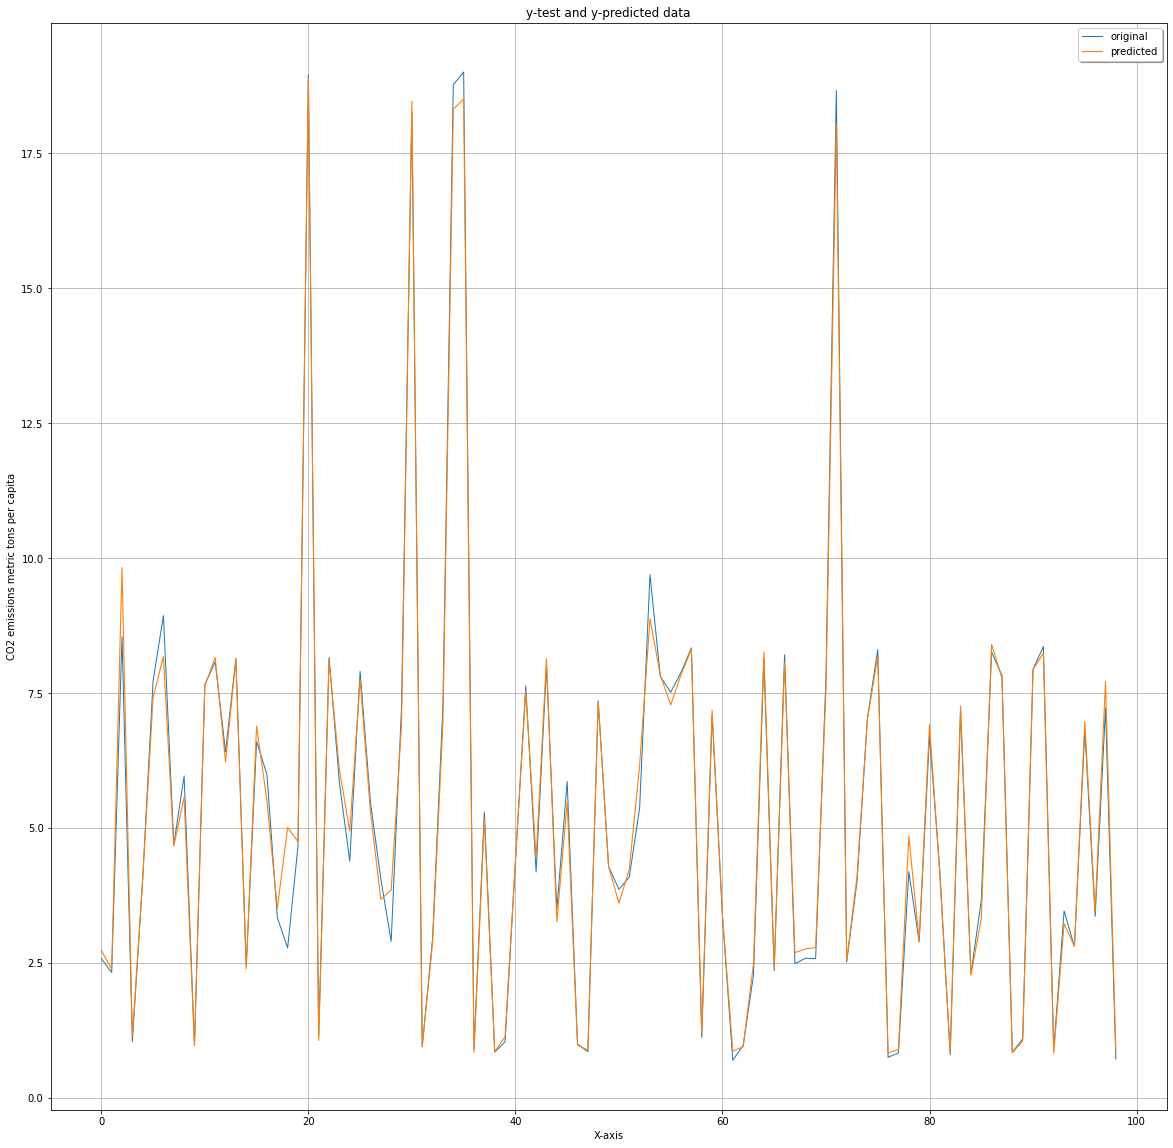

In [134]:
x_ax = range(len(yravel_te))
plt.plot(x_ax, yravel_te, linewidth=1, label="original")
plt.plot(x_ax, ypred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('CO2 emissions metric tons per capita')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.rcParams['figure.figsize'] = (20,20)
plt.grid(True)
plt.show() 

In [135]:
importance = rf.feature_importances_

In [136]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

In [91]:

feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [92]:
feature_importances.head(60)

,importance
"Improved sanitation facilities, rural (% of rural population with access)",0.124710
"Lower secondary completion rate, both sexes (%)",0.071723
"Employment to population ratio, ages 15-24, total (%) (national estimate)",0.065069
Population in urban agglomerations of more than 1 million (% of total population),0.058707
"Labor force participation rate for ages 15-24, female (%) (national estimate)",0.043010
"Labor force participation rate, female (% of female population ages 15+) (national estimate)",0.040938
"Improved sanitation facilities, urban (% of urban population with access)",0.039655
Arable land (hectares per person),0.038397
"Employment to population ratio, ages 15-24, female (%) (national estimate)",0.033251
"Wage and salaried workers, female (% of females employed)",0.029571


In [93]:
feature_importances.to_csv('feature_importances_countries.csv', index=False)

1. Improved sanitation facilities, rural (% of rural population with access)
2. Personal remittances, received (% of GDP)
3. Urban population growth (annual %)
4. Arable land (hectares per person)
5. Gross enrolment ratio, tertiary, male (%)
6. Improved water source, urban (% of urban population with access)
7. Energy use (kg of oil equivalent per capita)
8. Prevalence of anemia among non-pregnant women (% of women ages 15-49)
9. GDP per person employed (constant 1990 PPP dollars)
10. Household final consumption expenditure per capita (constant 2005 US dollars)
11. Electric power consumption (kWh per capita)
12. Lower secondary completion rate, both sexes (%)
13. Adjusted savings: net forest depletion (% of GNI)
14. Enrolment in secondary vocational, both sexes (number)
15. Population in the largest city (% of urban population)
16. GDP per capita (constant 2005 US$)

In [94]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [95]:
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectKBest(score_func=f_regression, k=88)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

0

In [138]:
X_train_fs, X_test_fs, fs = select_features(X_train, yravel_tr, X_test)

In [139]:
model = LinearRegression()
model.fit(X_train_fs, yravel_tr)
yhat = model.predict(X_test_fs)
mae = mean_absolute_error(yravel_te, yhat)
print(mae)

0.1885453304179125


thresh = 2000 means drop columns with more than 2000 NA values

In [151]:
a = np.zeros((10,3))

In [155]:
threshs = [300,266,233,200,166,133,100,50,25,10]

In [156]:
for i in range(len(threshs)):
    a[i,0] = threshs[i]
    dfthresh = dftr.dropna(thresh=len(dftr)-threshs[i], axis=1)
    dfthreshnostring = dfthresh.drop(['CountryCode', 'CountryName'], axis=1)
    
    dfthreshnostring = dfthreshnostring.apply(lambda x: x.fillna(x.mean()), axis =0)

    Xdata = dfthreshnostring.loc[:, dfthreshnostring.columns != "CO2 emissions (metric tons per capita)"]
    Ydata = dfthreshnostring.loc[:, dfthreshnostring.columns == "CO2 emissions (metric tons per capita)"]
    X_train, X_test, y_train, y_test = train_test_split(Xdata, Ydata, test_size = 0.3)
    yravel_tr = y_train.loc[:, "CO2 emissions (metric tons per capita)"]
    yravel_tr = yravel_tr.values
    rf = RandomForestRegressor(n_estimators = 100)
    rf= rf.fit(X_train, yravel_tr)
    score = rf.score(X_train, yravel_tr)
    a[i,1] = score
    yravel_te = y_test.loc[:, "CO2 emissions (metric tons per capita)"]
    yravel_te = yravel_te.values
    ypred = rf.predict(X_test)
    mse = mean_squared_error(yravel_te, ypred)
    a[i,2] = mse

In [157]:
a

array([[3.00000000e+02, 9.98216478e-01, 1.60233702e-01],
       [2.66000000e+02, 9.98203263e-01, 3.68265726e-01],
       [2.33000000e+02, 9.97779569e-01, 1.68633073e-01],
       [2.00000000e+02, 9.98418020e-01, 3.64372339e-01],
       [1.66000000e+02, 9.97661566e-01, 6.54862080e-01],
       [1.33000000e+02, 9.99338157e-01, 8.20712084e-02],
       [1.00000000e+02, 9.98540557e-01, 8.03464314e-02],
       [5.00000000e+01, 9.98373254e-01, 8.26156095e-02],
       [2.50000000e+01, 9.98061785e-01, 2.74703495e-01],
       [1.00000000e+01, 9.98300692e-01, 1.09915379e-01]])

In [158]:
a.round(decimals = 2)

array([[3.00e+02, 1.00e+00, 1.60e-01],
       [2.66e+02, 1.00e+00, 3.70e-01],
       [2.33e+02, 1.00e+00, 1.70e-01],
       [2.00e+02, 1.00e+00, 3.60e-01],
       [1.66e+02, 1.00e+00, 6.50e-01],
       [1.33e+02, 1.00e+00, 8.00e-02],
       [1.00e+02, 1.00e+00, 8.00e-02],
       [5.00e+01, 1.00e+00, 8.00e-02],
       [2.50e+01, 1.00e+00, 2.70e-01],
       [1.00e+01, 1.00e+00, 1.10e-01]])

Smallest error occurs when our threshold was when thresh = len(dftr) - 10 or len(dftr)-300
We went with 328 - 300 as the threshold instead of 328 - 10